In [28]:
import tensorflow_hub as hub
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [29]:
texts = [
    # Кластер 1: Технологии
    "Компания Apple анонсировала новый iPhone с улучшенной камерой и процессором",
    "Искусственный интеллект научился генерировать реалистичные голоса за секунды",
    "Ученые разработали квантовый компьютер с рекордным числом кубитов",
    "Android 15 получил революционную систему управления энергопотреблением",
    "Нейросеть Midjourney создает фотореалистичные изображения по текстовому описанию",
    "Tesla представила робота-гуманоида с автономной системой навигации",
    "Blockchain-платформа Ethereum перешла на алгоритм консенсуса Proof-of-Stake",
    "В Китае запустили спутниковый интернет с покрытием всей территории страны",
    "Вирусологи создали алгоритм для предсказания мутаций коронавируса",
    "Робот-хирург провел первую операцию без участия человека в Японии",
    
    # Кластер 2: Финансы
    "Биткоин вырос на 15% после одобрения ETF на криптовалюты в США",
    "Центробанк России повысил ключевую ставку до 16% для борьбы с инфляцией",
    "Курс доллара превысил 100 рублей на Московской бирже впервые с марта",
    "Акции Tesla упали на 5% после отзыва миллионов электромобилей",
    "Китайский юань укрепляется на фоне снижения ставки ФРС США",
    "Европейский союз ввел новые санкции против российских банков",
    "Нефть Brent подорожала до $95 за баррель из-за конфликта на Ближнем Востоке",
    "Криптобиржа Binance оштрафована на $4 млрд за нарушения AML-законодательства",
    "Золото достигло рекордной цены в $2200 за тройскую унцию",
    "Мировой долг превысил $300 трлн по данным Institute of International Finance",
    
    # Кластер 3: Спорт
    "Футбольный клуб Манчестер Юнайтед подписал контракт с бразильским нападающим",
    "Российский теннисист выиграл турнир Большого шлема в пятый раз",
    "Олимпийский комитет разрешил спортсменам из России участвовать в Париже-2024",
    "Баскетболист Леброн Джеймс побил рекорд НБА по количеству очков за карьеру",
    "ФИФА изменила правила офсайда с использованием системы автоматического отслеживания",
    "Хоккейная сборная Канады выиграла чемпионат мира в овертайме со счетом 3:2",
    "Боксер Тайсон Фьюри объявил о возвращении на ринг после годичного перерыва",
    "Автогонки Формула-1 введут новые экологические правила с 2026 года",
    "Пловец из США установил мировой рекорд на дистанции 200 метров баттерфляем",
    "ФИС дисквалифицировала российских лыжников за нарушение антидопинговых правил"
]

In [30]:
# Загрузка модели USE
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")

# Получение эмбеддингов
embeddings = model(texts)['outputs'].numpy()
print(f"Размерность эмбеддингов: {embeddings.shape}")  # (11, 512)

Размерность эмбеддингов: (30, 512)


In [31]:
# Определяем число кластеров
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Результаты
for text, cluster in zip(texts, clusters):
    print(f"Кластер {cluster}: {text}")

Кластер 1: Компания Apple анонсировала новый iPhone с улучшенной камерой и процессором
Кластер 1: Искусственный интеллект научился генерировать реалистичные голоса за секунды
Кластер 0: Ученые разработали квантовый компьютер с рекордным числом кубитов
Кластер 2: Android 15 получил революционную систему управления энергопотреблением
Кластер 0: Нейросеть Midjourney создает фотореалистичные изображения по текстовому описанию
Кластер 2: Tesla представила робота-гуманоида с автономной системой навигации
Кластер 1: Blockchain-платформа Ethereum перешла на алгоритм консенсуса Proof-of-Stake
Кластер 0: В Китае запустили спутниковый интернет с покрытием всей территории страны
Кластер 1: Вирусологи создали алгоритм для предсказания мутаций коронавируса
Кластер 1: Робот-хирург провел первую операцию без участия человека в Японии
Кластер 1: Биткоин вырос на 15% после одобрения ETF на криптовалюты в США
Кластер 0: Центробанк России повысил ключевую ставку до 16% для борьбы с инфляцией
Кластер 0: Ку

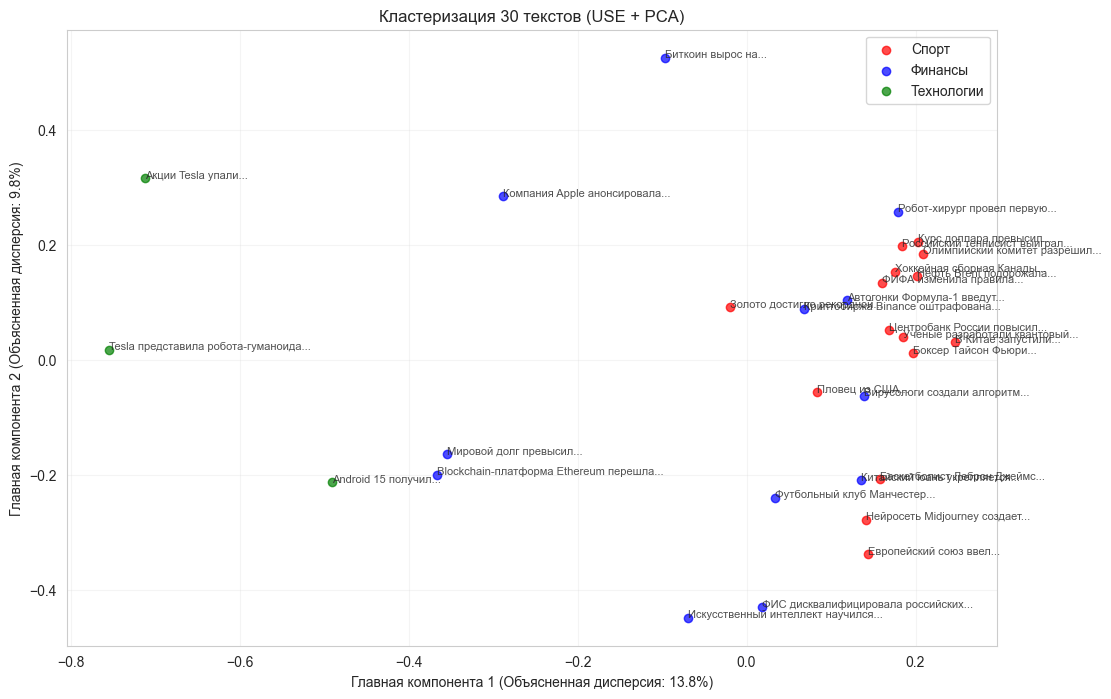

In [33]:
# Уменьшение размерности
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Цвета и метки
colors = ['red', 'blue', 'green']
cluster_names = ["Спорт", "Финансы", "Технологии"]

# График
plt.figure(figsize=(12, 8))
for i in range(3):
    mask = (clusters == i)
    plt.scatter(
        embeddings_2d[mask, 0], 
        embeddings_2d[mask, 1],
        c=colors[i],
        label=cluster_names[i],
        alpha=0.7
    )

# Подписи (первые 3 слова)
for i, text in enumerate(texts):
    plt.annotate(
        ' '.join(text.split()[:3]) + "...", 
        (embeddings_2d[i, 0], embeddings_2d[i, 1]),
        fontsize=8,
        alpha=0.8
    )

plt.title("Кластеризация 30 текстов (USE + PCA)")
plt.xlabel("Главная компонента 1 (Объясненная дисперсия: {:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Главная компонента 2 (Объясненная дисперсия: {:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()
plt.grid(alpha=0.2)
plt.show()